In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw.util import Point
#schemdraw.use('svg')
#schemdraw.settextmode('text')

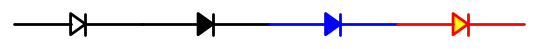

In [2]:
# Fill parameter. fill(True) picks up element color
d = schemdraw.Drawing()
d += elm.Diode()   # No fill
d += elm.Diode().fill(True)  # Black fill
d += elm.Diode().color('blue').fill(True)   # Blue fill
d += elm.Diode().color('red').fill('yellow')   # Yellow fill
d.draw()

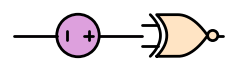

In [3]:
# Fill on paths (like the gate) and shapes (like the source)
d = schemdraw.Drawing()
d.add(elm.SourceV().right().fill('plum'))
d.add(logic.Xnor().fill('bisque'))
d.draw()

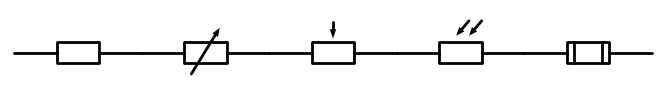

In [4]:
# IEEE vs IEC style
elm.style(elm.STYLE_IEC)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

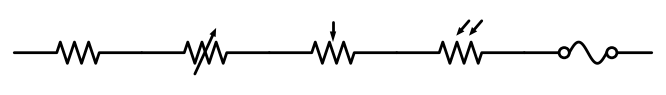

In [5]:
elm.style(elm.STYLE_IEEE)
d = schemdraw.Drawing()
d += elm.Resistor()
d += elm.ResistorVar()
d += elm.Potentiometer()
d += elm.Photoresistor()
d += elm.Fuse()
d.draw()

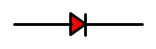

In [6]:
# Custom elm.style per element
from functools import partial
elm.style({'Diode': partial(elm.Diode, fill='red')})
elm.Diode()

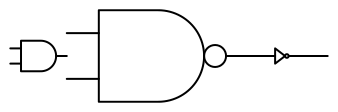

In [7]:
# Scale/zoom
d = schemdraw.Drawing()
d += logic.And()
d += logic.Nand().scale(3)
d += logic.Not().scale(.5)
d

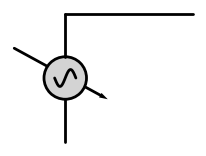

In [8]:
# Zorder. Arrow goes behind.
class TestZorder(elm.SourceSin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([[1.2, 1.2], [0, -1]], arrow='>',
                                          arrowwidth=.12, arrowlength=.2, zorder=0))

d = schemdraw.Drawing()
d.add(TestZorder().fill('lightgray'))
d.add(elm.Line().right())
d.draw()

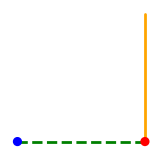

In [9]:
# Nested ElementDrawing. Three different colors
with schemdraw.Drawing(show=False) as d1:
    d1 += elm.Dot().color('red') # This color overrides orange color set on ElementDrawing
    d1 += elm.Line().up()  # This line picks up color from ElementDrawing (orange)

with schemdraw.Drawing() as d2:
    d2 += elm.Dot().color('blue')
    d2 += elm.Line().color('green').linestyle('--')
    d2 += elm.ElementDrawing(d1).color('orange')

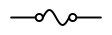

In [10]:
# Themes
def drawtheme(theme):
    schemdraw.theme(theme)
    d = schemdraw.Drawing()
    d += elm.Fuse()  # Use Fuse since it shows open dots that should fill with bg color
    return d
    
drawtheme('default')

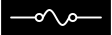

In [11]:
drawtheme('dark')

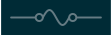

In [12]:
drawtheme('solarizedd')

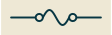

In [13]:
drawtheme('solarizedl')

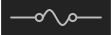

In [14]:
drawtheme('monokai')

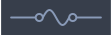

In [15]:
drawtheme('onedork')

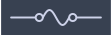

In [16]:
drawtheme('oceans16')

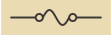

In [17]:
drawtheme('gruvboxl')

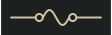

In [18]:
drawtheme('gruvboxd')

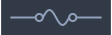

In [19]:
drawtheme('chesterish')

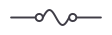

In [20]:
drawtheme('grade3')

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


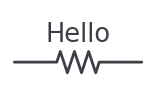

In [21]:
# Setting drawing defaults, can be overridden by elements
d = schemdraw.Drawing(font='Times', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw()

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


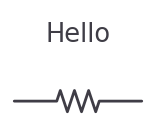

In [22]:
d = schemdraw.Drawing(font='Times', fontsize=20, lblofst=1)
d += elm.Resistor().label('Hello')
d.draw()

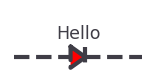

In [23]:
d = schemdraw.Drawing(ls='--', lw=3, fill='red')
d += elm.Diode().label('Hello')
d.draw()

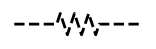

In [24]:
elm.Resistor().linestyle('--')

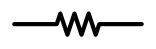

In [25]:
elm.Resistor().linewidth(3)

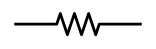

In [26]:
elm.Resistor(capstyle='butt')

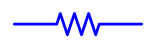

In [27]:
elm.Resistor().color('blue')

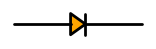

In [28]:
elm.Diode().fill('orange')

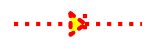

In [29]:
elm.Diode().style(color='red', fill='yellow', ls=':', lw=3)

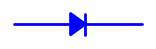

In [30]:
elm.Diode().color('blue').fill(True)  # fill=True picks up element color (poly segment)

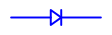

In [31]:
d = schemdraw.Drawing(fill='red')
d += elm.Diode().color('blue').fill(False)  # fill=False leaves open even with drawing fill set
d

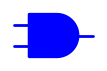

In [32]:
logic.And().color('blue').fill(True)  # fill=True picks up element color (poly segment)

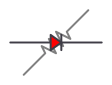

In [33]:
# Resistor should go behind
d = schemdraw.Drawing()
d += (D := elm.Diode().zorder(3))
d += elm.Resistor(d=45).at(D.center).anchor('center').color('gray')
d

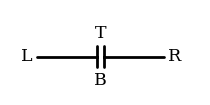

In [34]:
(elm.Capacitor()
     .label('L', font='serif', loc='lft')
     .label('R', font='serif', loc='rgt')
     .label('T', font='serif', loc='top')
     .label('B', font='serif', loc='bot'))

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:726: UserWarning: Duplicated direction parameter in element. `up` changed to `down`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `down`.")


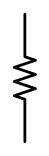

In [35]:
# REMAINING TESTS SHOULD RAISE WARNINGS
elm.Resistor().up().down()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:717: UserWarning: Duplicated direction parameter in element. `down` changed to `up`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `up`.")


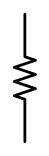

In [36]:
elm.Resistor().down().up()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:735: UserWarning: Duplicated direction parameter in element. `up` changed to `left`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `left`.")


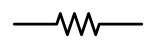

In [37]:
elm.Resistor().up().left()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:744: UserWarning: Duplicated direction parameter in element. `up` changed to `right`.
  warnings.warn(f"Duplicated direction parameter in element. `{self._userparams['d']}` changed to `right`.")


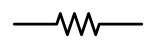

In [38]:
elm.Resistor().up().right()

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:121: UserWarning: Duplicate direciton parameter in element: `up` replaced with `theta=45`
  warnings.warn("Duplicate direciton parameter in element:"


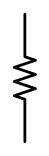

In [39]:
elm.Resistor().up().theta(45)

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:141: UserWarning: Duplicate `at` parameter in element: `Point(1,1)` changed to `Point(2,2)`.
  warnings.warn("Duplicate `at` parameter in element: "


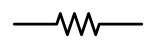

In [40]:
elm.Resistor().at((1,1)).at((2,2))

/home/collindelker/Code/schemdraw/schemdraw/elements/elements.py:171: UserWarning: Duplicate anchor parameter in element: `center` changed to `center`.
  warnings.warn("Duplicate anchor parameter in element: "


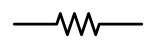

In [41]:
elm.Resistor().anchor('center').anchor('center')